We first try to get the fundamental solution to the following problem. 

\begin{equation}
\begin{split}
    u_{xx}-u\,u_{t} &= \delta(x-\xi)\,\delta(t-\tau) \\
    u(x,t) &= 0 \quad \text{ for } \quad x \rightarrow \infty, \\
    u(x,0) &= 0.
\end{split}
\end{equation}

Once we get the fundamental solution, the solution to the original problem will be a matter of simple change of variable, reformulation of boundary and initial conditions using the properties of delta function, or application of image sources.

Without loss of generality, the fundamental solution for $\xi=0$ and $\tau=0$ would be just fine.

Following the procedure for the 1D heat diffusion equation, we denote a solution to the above initial and boundary value problem as $F(x,t)$. Now, let's assume that another solution $G(x,t)$ exists and is related to $F$ through as follows:

\begin{equation}
G(x,t) \equiv \alpha\,F(\beta x,\gamma t) = \alpha\,F(\bar{x},\bar{t}), 
\end{equation}

where $\bar{x}=\beta\,x$ and $\bar{t}=\gamma\,t$.

Since $G$ satisfies the above PDE,

\begin{align}
    G_{xx}-G\,G_{t} = \delta(x)\,\delta(t).
\end{align}

Equivalently, 

\begin{align}
    \alpha\,\beta^{2}F_{\bar{x}\bar{x}}-\alpha\,F\,\alpha\,\gamma\,F_{\bar{t}} &= \delta\left(\frac{\bar{x}}{\beta}\right)\,\delta\left(\frac{\bar{t}}{\gamma}\right) \\
    \rightarrow \quad F_{\bar{x}\bar{x}}-\frac{\alpha\,\gamma}{\beta^{2}}F\,F_{\bar{t}} &= \frac{\gamma}{\alpha\,\beta}\delta(\bar{x})\,\delta(\bar{t})
\end{align}

Since we assumed that $F$ is also the solution, the invariance of PDE implies that

\begin{align}
    \alpha\,\gamma &= \beta^{2} \\
    \gamma &= \alpha\,\beta
\end{align}

or

\begin{align}
    \beta &= \alpha^{2} \\
    \gamma &= \alpha^{3}
\end{align}

Plugging these relations to \eqref{eq:G and F}, we get

\begin{align}
    G(x,t) = \alpha\,F(\alpha^{2}\,x,\alpha^{3}\,t) = F(x,t).
\end{align}

This implies that the following can be the functional form of $F$:

\begin{align}
    F(x,t) = \frac{1}{t^{1/3}}\,f\left( \frac{x}{t^{2/3}} \right) = \frac{1}{t^{1/3}}\,f(\zeta),
\end{align}
where $\zeta = \frac{x}{t^{2/3}} \ge 0$.

Partial derivates of such $F$ are given as

\begin{align}
    F_{t} &= -\frac{1}{3t^{4/3}} f - \frac{2x}{3t^{2}}f^{'} \\
    F_{x} &= \frac{1}{t} f^{'} \\
    F_{xx} &= \frac{1}{t^{5/3}} f^{''}
\end{align}

Plugging these into the homogeneous version of the PDE, $F_{xx}-F\,F_{t}=0$, and simplifying it, we get

\begin{equation}
    f^{''} + \frac{1}{3}\,f^{2} + \frac{2}{3}\zeta\,f\,f^{'}=0.
\end{equation}

**The above equation is the ODE we sought**. Like the ODE for the 1D linear diffusion equation, this is also exact: i.e.,

\begin{align}
    \frac{d}{d\zeta}\left( f^{'} + \frac{\zeta}{3}\,f^{2} \right) = 0.
\end{align}

So, 

\begin{align}
    f^{'} + \frac{\zeta}{3}\,f^{2} = A,
\end{align}

where $A$ is an integration constant.

This non-linear first order ODE is called Riccati equation and there is no general solution to this type.
However, our specific equation does have a solution, which is according to Wolfram alpha (http://www.wolframalpha.com/),

\begin{align}
f(\zeta) = \frac{3\left(\frac{A}{3}\right)^{2/3} \left[ k_{1}\,\text{Ai}\left( (A/3)^{1/3}\,\zeta \right) + \text{Bi}\left( (A/3)^{1/3}\,\zeta \right) \right]}{\left[ k_{1}\,\text{Ai}^{'}\left( (A/3)^{1/3}\,\zeta \right) + \text{Bi}^{'}\left( (A/3)^{1/3}\,\zeta \right) \right]},
\end{align}

where $k_{1}$ is another integration constant, $\text{Ai}$ is the Airy function (http://en.wikipedia.org/wiki/Airy_function, http://dlmf.nist.gov/9), $\text{Bi}$ is the Airy function of the second kind, and $\text{Ai}^{'}$ and $\text{Bi}^{'}$ are the respective derivative.

Therefore, our solution $F(x,t)$ is finally given as

\begin{align}
f(\zeta) = \frac{3^{1/3}A^{2/3}\,\left[ k_{1}\,\text{Ai}\left( (A/3)^{1/3}\,\zeta \right) + \text{Bi}\left( (A/3)^{1/3}\,\zeta \right) \right]}{t^{1/3}\,\left[ k_{1}\,\text{Ai}^{'}\left( (A/3)^{1/3}\,\zeta \right) + \text{Bi}^{'}\left( (A/3)^{1/3}\,\zeta \right) \right]}.
\end{align}

The integration constants, $k_{1}$ and $A$ should be determined by the boundary conditions.
Just to give you a sense of how this solution behaves, $F(x,t)$ is plotted for selected values of $t$ with $k_{1}=1$ and $A=3$.

In [1]:
from scipy.special import *

def get_soln(x,t):
    Ai, Aip, Bi, Bip = airy((x)/t**(2.0/3.0))
    return (Ai+Bi)/(t**(1.0/3.0)*(Aip+Bip))
#    return Bi/(t**(1.0/3.0)*(Bip))

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook

x1=np.linspace(0,25,1001)

sol1 = get_soln(x1, 1.0)
sol2 = get_soln(x1, 10.0)
sol3 = get_soln(x1, 30.0)
sol4 = get_soln(x1, 100.0)
sol5 = get_soln(x1, 500.0)

<IPython.core.display.Javascript object>


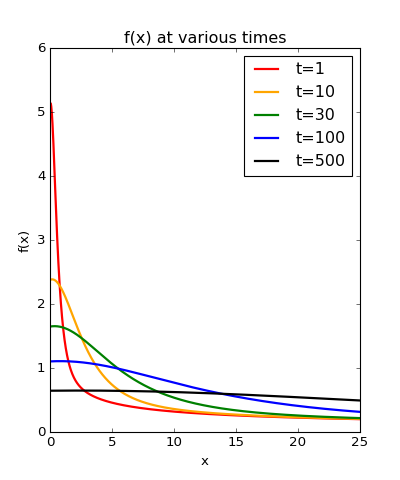

In [3]:
fig, ax = plt.subplots(1,1,figsize=(5,6))
plt.rcParams.update({'font.size': 12})

ax.plot(x1, sol1, '-', color='red', linewidth=2, label='t=1')
ax.plot(x1, sol2, '-', color='orange', linewidth=2, label='t=10')
ax.plot(x1, sol3, '-', color='green', linewidth=2, label='t=30')
ax.plot(x1, sol4, '-', color='blue', linewidth=2, label='t=100')
ax.plot(x1, sol5, '-', color='black', linewidth=2, label='t=500')
ax.set_xlabel('x')
ax.set_ylabel('f(x)')
ax.set_title('f(x) at various times')
ax.legend()